In [75]:
!pip install scikeras

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasRegressor
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression

<Axes: >

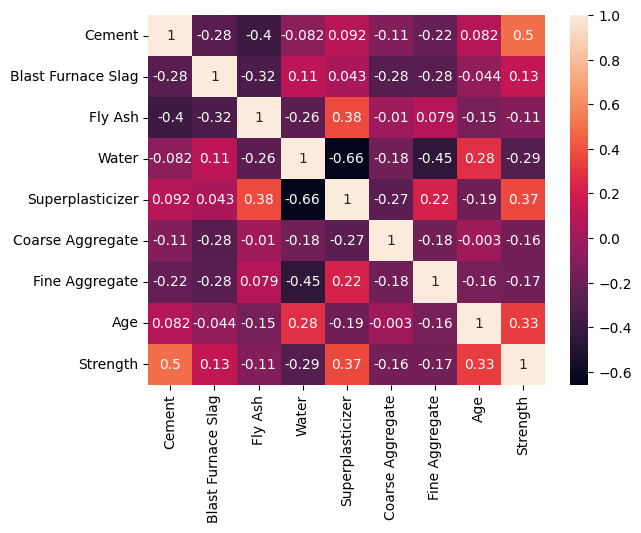

In [77]:
df = pd.read_csv('concrete_data.csv')

import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [106]:
X = df[['Water']]
y = df['Superplasticizer']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [79]:
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[1]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

### saving and restoring

In [81]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - loss: 73.1077 - val_loss: 79.9223
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 67.5192 - val_loss: 73.9482
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 62.4720 - val_loss: 67.9479
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 57.1859 - val_loss: 60.8095
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 50.8900 - val_loss: 51.8081
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 42.9949 - val_loss: 40.5368
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 33.7889 - val_loss: 29.7411
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.9212 - val_loss: 23.5654
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.8441 - val_loss: 21.6546
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.4162 - val_loss: 21.2359
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.8298 - val_loss: 21.1544
Epoch 12/100
19/19 ━━━━━━━━━━━━━━━━

In [82]:
model.save("my_keras_model.keras")

In [83]:
model = keras.models.load_model("my_model.keras")

In [84]:
X_new = X_test[:3]

In [85]:
model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[ 2.3754086],
       [10.223725 ],
       [15.5666065]], dtype=float32)

### using callbacks during training

In [86]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.keras")
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 18.9837 - val_loss: 21.7275
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.9853 - val_loss: 21.7211
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.9840 - val_loss: 21.7170
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.9835 - val_loss: 21.7113
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.9826 - val_loss: 21.7068
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.9825 - val_loss: 21.7014
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 18.9802 - val_loss: 21.6975
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.9792 - val_loss: 21.6913
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.9769 - val_loss: 21.6854
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 18.9746 - val_loss: 21.6809
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17.6245 


In [87]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 18.9751 - val_loss: 21.6757
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.9748 - val_loss: 21.6700
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 18.9753 - val_loss: 21.6653
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 18.9757 - val_loss: 21.6603
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 18.9772 - val_loss: 21.6544
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 18.9765 - val_loss: 21.6499
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 18.9772 - val_loss: 21.6435
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 18.9764 - val_loss: 21.6405
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 18.9784 - val_loss: 21.6341
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 18.9772 - val_loss: 21.6287
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 18.9771 - val_loss: 21.6242
Epoch 12/100
19/19 ━━━━━━━━━━━

In [88]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [89]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 26.0578
val/train: 1.27
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.9625 - val_loss: 21.4070


### hyperparameter tuning

In [112]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(1,)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
    return model

keras_reg = KerasRegressor(
    model=build_model,
    n_hidden=1,
    n_neurons=30,
    learning_rate=3e-3,
    input_shape=(1,),
    epochs=100,
    verbose=0
)

keras_reg.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

mse_test = keras_reg.score(X_test, y_test)
print("Test MSE:", mse_test)

Test MSE: 0.49807086747345797


In [113]:
X_new = X_test[:3]

In [114]:
y_pred = keras_reg.predict(X_new)

## Classification

<Axes: >

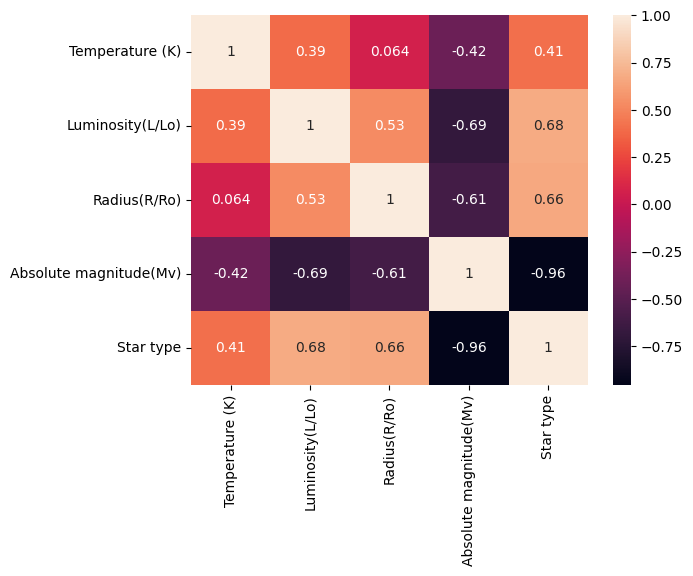

In [116]:
df = pd.read_csv('6 class csv.csv')

df = df.drop(columns=['Star color', 'Spectral Class'])

import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [119]:
X = df.drop(columns=['Star type', 'Temperature (K)'])
y = df['Star type']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [120]:
np.random.seed(42)
tf.random.set_seed(42)

In [121]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[3]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

### saving and restoring

In [122]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - loss: 12.3172 - val_loss: 11.2412
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 11.6420 - val_loss: 10.6161
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.0396 - val_loss: 10.0585
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 10.4993 - val_loss: 9.5530
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.0105 - val_loss: 9.0913
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.5642 - val_loss: 8.6644
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.1508 - val_loss: 8.2665
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.7661 - val_loss: 7.8965
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.4057 - val_loss: 7.5471
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 8.0662 - val_loss: 7.2142
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.7465 - val_loss: 6.8953
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.4412

In [123]:
model.save("classification_keras_model.keras")

In [124]:
model = keras.models.load_model("classification_keras_model.keras")

In [125]:
X_new = X_test[:3]

In [126]:
model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[1.1651503],
       [0.7716447],
       [1.9145577]], dtype=float32)

### using callbacks during training

In [127]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("classification_keras_model.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("classification_keras_model.keras")
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - loss: 0.4602 - val_loss: 0.6211
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4559 - val_loss: 0.6149
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4516 - val_loss: 0.6087
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4474 - val_loss: 0.6026
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4433 - val_loss: 0.5966
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.4393 - val_loss: 0.5906
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.4353 - val_loss: 0.5847
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4314 - val_loss: 0.5789
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4275 - val_loss: 0.5732
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.4238 - val_loss: 0.5676
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4560 


In [128]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.4201 - val_loss: 0.5621
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4165 - val_loss: 0.5567
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4129 - val_loss: 0.5514
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.4094 - val_loss: 0.5462
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4060 - val_loss: 0.5410
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4026 - val_loss: 0.5360
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.3993 - val_loss: 0.5311
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3961 - val_loss: 0.5262
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3929 - val_loss: 0.5214
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3898 - val_loss: 0.5166
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.3868 - val_loss: 0.5120
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.3838 - val_lo

In [129]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [130]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2193
val/train: 1.24
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2550 - val_loss: 0.3214


### hyperparameter tuning

In [132]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=(3,)):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
    return model

keras_reg = KerasRegressor(
    model=build_model,
    n_hidden=1,
    n_neurons=30,
    learning_rate=3e-3,
    input_shape=(3,),
    epochs=100,
    verbose=0
)

keras_reg.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)]
)

mse_test = keras_reg.score(X_test, y_test)
print("Test MSE:", mse_test)

Test MSE: 0.9345864057540894


In [133]:
X_new = X_test[:3]

In [134]:
y_pred = keras_reg.predict(X_new)